### Initial image enhancement example

This notebook is intended as a demonstration of the preliminary image processing steps of the sketch image that allow for its optimal binarization (the converting of pixel image to binary image).

In [1]:
# import required libraries

import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt
from skimage import io, color, exposure
%matplotlib inline

In [2]:
# import one of the sketches and convert it to grayscale

im=io.imread('paper_breaks.png')
im = color.rgb2gray(im[0:-1:2,0:-1:2])

[]

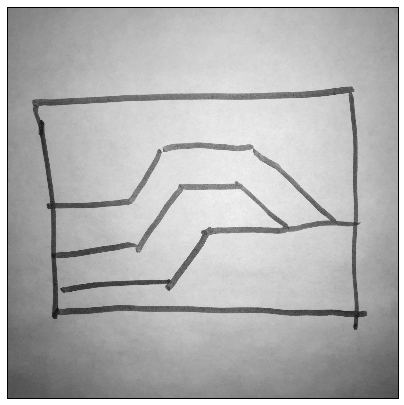

In [3]:
# plot it

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

plt.imshow(im, cmap='gray')

ax.set_xticks([])
ax.set_yticks([])


Next we will enhance this image with a couple of cascaded processes.

But before we do that let's look at a cross section in the y direction to understand how the edges fare compared to the background in terms of intensity, which ultimately will determine our success in separating them from it.

In [4]:
flt = np.ones(13) # 1D convolutional filter to smooth the cross section for ease of view

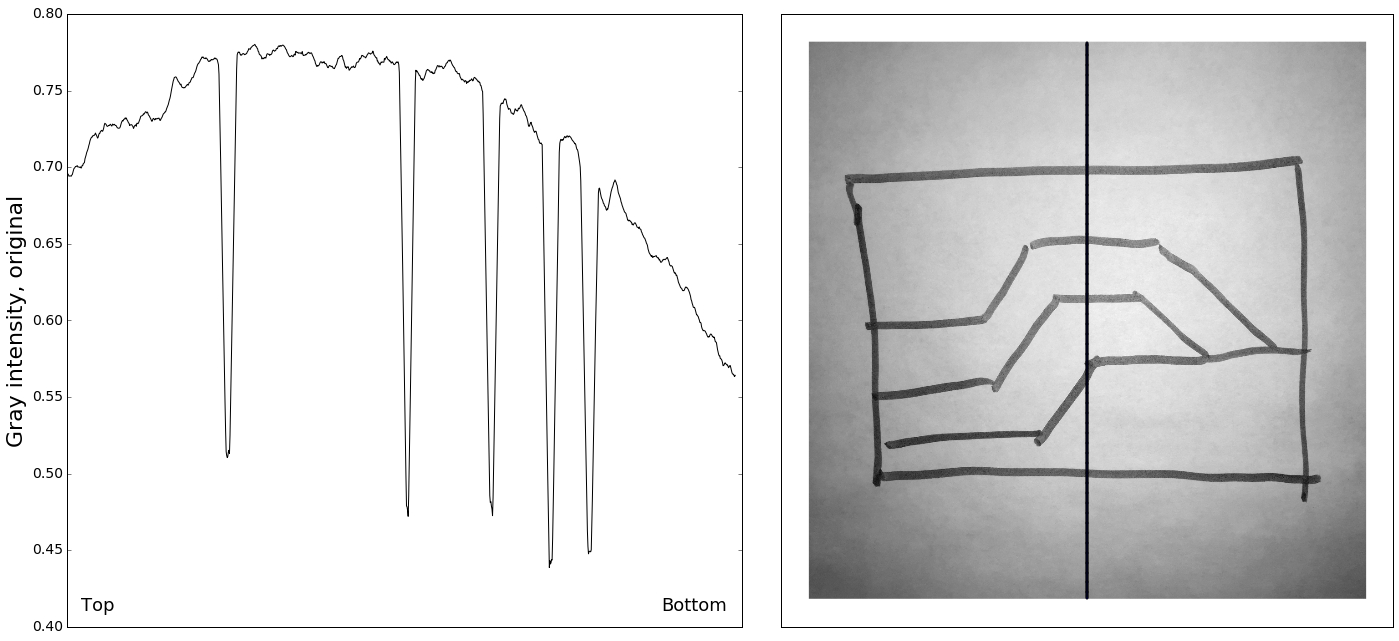

In [5]:
fig = plt.figure(figsize=(20, 9))
ax = fig.add_subplot(1,2,1)
plt.plot(signal.convolve(im[:, 200], flt, mode='valid') / sum(flt), color='k')
plt.xlim(0, 1223)
ax.set_xticks([])
ax.text(0.02, 0.02, 'Top',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='k', fontsize=18)
ax.text(0.88, 0.02, 'Bottom',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='k', fontsize=18)

plt.ylabel('Gray intensity, original', fontsize=22)
ax.yaxis.set_tick_params(labelsize=14)


ax1 = fig.add_subplot(1, 2, 2)
plt.imshow(im, cmap='gray')
plt.scatter(x=[np.ones(612)*612], y=[np.arange(0,1224,2)], s=4)
ax1.set_xticks([])
ax1.set_yticks([])
plt.tight_layout()

 It is fairly obivous from this plot that the intensity of the background is not uniform, due to variable light conditions when the photo wa taken, and towards the right (e.g. bottom of the photo) it gets closer to that of the edges. In some images it may even become less than the intensity of the edge. This highlights the need for the enhancements below.

In [6]:
# compressor or limiter (electronics) 
# find hard edges in data with long wavelength variations in amplitude

# (1) square each element in the image to obtain the power function
sqr = im**2

# (2) gaussian of squared image
flt2 = sp.ndimage.filters.gaussian_filter(sqr,21)

# (3) divide the intensity of each original pixel by the square root 
# of the smoothed square
cmprs= im/(np.sqrt(flt2))

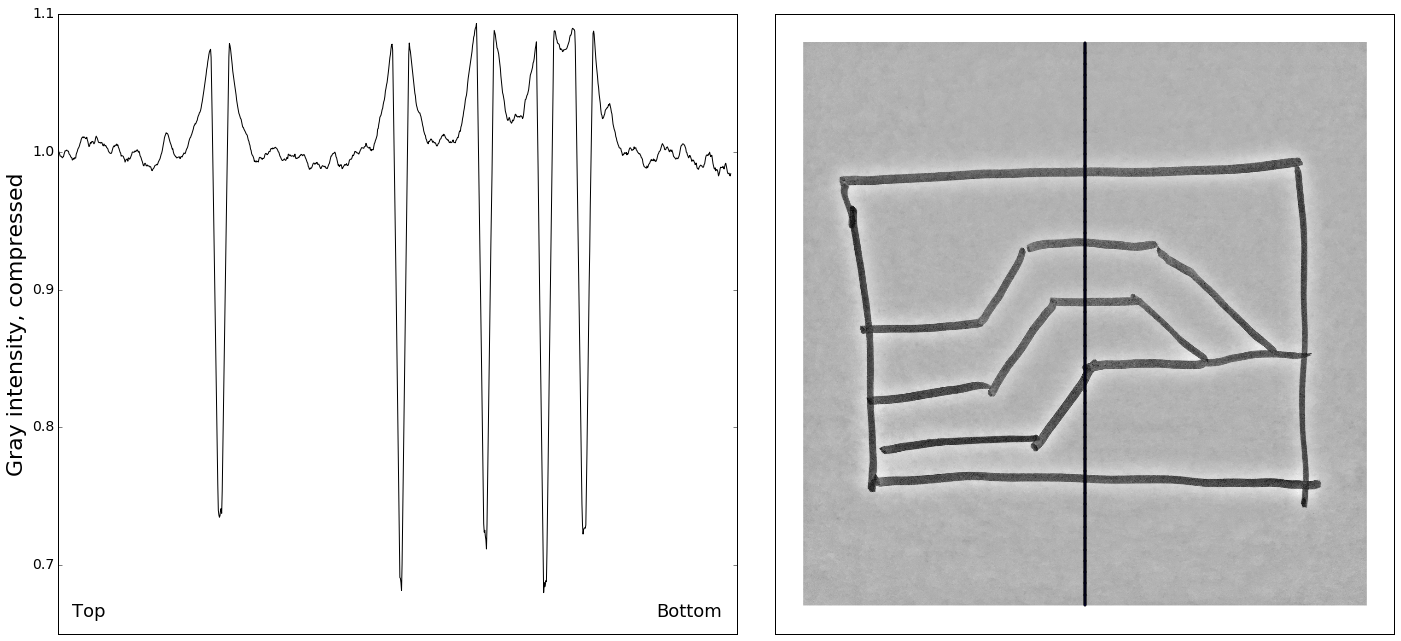

In [7]:
fig = plt.figure(figsize=(20, 9))
ax = fig.add_subplot(1,2,1)
plt.plot(signal.convolve(cmprs[:, 200], flt, mode='valid') / sum(flt), color='k')
plt.xlim(0, 1223)
ax.set_xticks([])
ax.text(0.02, 0.02, 'Top',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='k', fontsize=18)
ax.text(0.88, 0.02, 'Bottom',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='k', fontsize=18)

plt.ylabel('Gray intensity, compressed', fontsize=22)
ax.yaxis.set_tick_params(labelsize=14)


ax1 = fig.add_subplot(1, 2, 2)
plt.imshow(cmprs, cmap='gray')
plt.scatter(x=[np.ones(612)*612], y=[np.arange(0,1224,2)], s=4)
ax1.set_xticks([])
ax1.set_yticks([])
plt.tight_layout()

From this plot we see that now the background intesity is uniform and the contrast has been  improved. Let's improve it further.

In [8]:
# contrast stretching
p2, p98 = np.percentile(cmprs, (2, 98))
rescale = exposure.rescale_intensity(cmprs, in_range=(p2, p98))

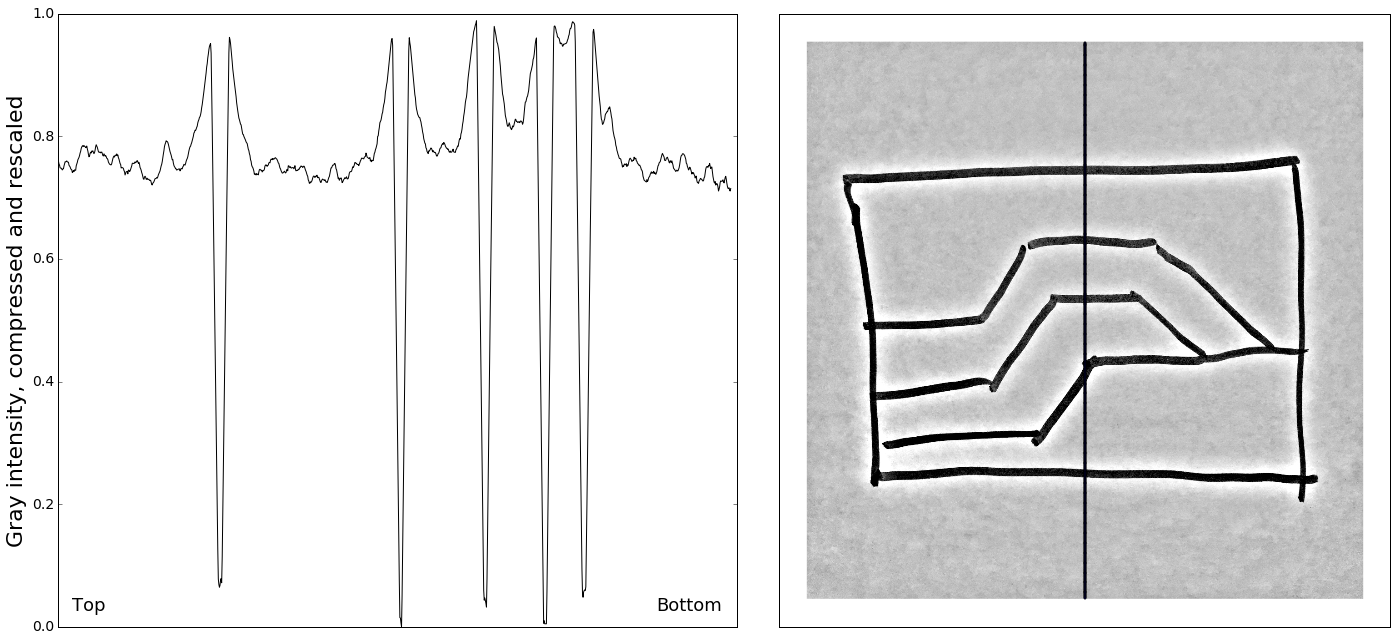

In [9]:
fig = plt.figure(figsize=(20, 9))
ax = fig.add_subplot(1,2,1)
plt.plot(signal.convolve(rescale[:, 200], flt, mode='valid') / sum(flt), color='k')
plt.xlim(0, 1223)
ax.set_xticks([])
ax.text(0.02, 0.02, 'Top',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='k', fontsize=18)
ax.text(0.88, 0.02, 'Bottom',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='k', fontsize=18)

plt.ylabel('Gray intensity, compressed and rescaled', fontsize=22)
ax.yaxis.set_tick_params(labelsize=14)


ax1 = fig.add_subplot(1, 2, 2)
plt.imshow(rescale, cmap='gray')
plt.scatter(x=[np.ones(612)*612], y=[np.arange(0,1224,2)], s=4)
ax1.set_xticks([])
ax1.set_yticks([])
plt.tight_layout()

We now have an idea contrast between edges and background, and can get a binary image with the correct edges using a scalar threshold.

In [10]:
# binarize image with scalar threshold
binary = ~(color.rgb2gray(rescale) > 0.5)

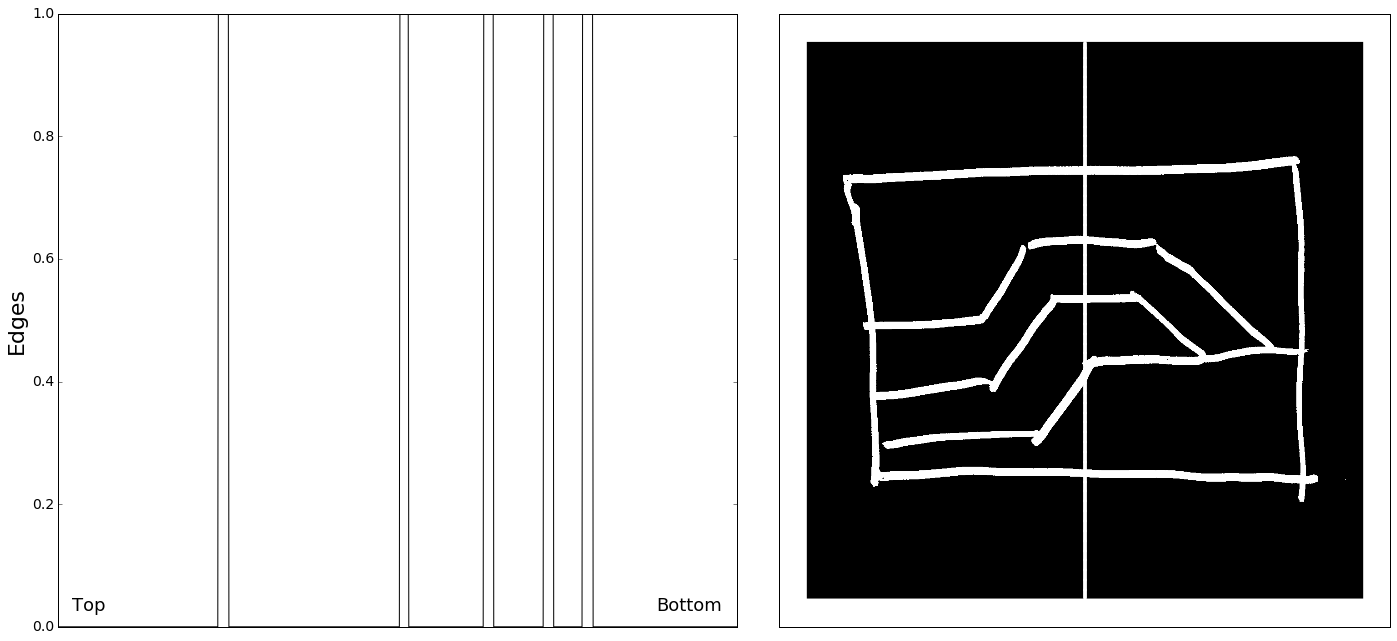

In [11]:
fig = plt.figure(figsize=(20, 9))
ax = fig.add_subplot(1,2,1)
plt.plot(binary[:, 200], color = 'k')
plt.xlim(0, 1223)
ax.set_xticks([])
ax.text(0.02, 0.02, 'Top',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='k', fontsize=18)
ax.text(0.88, 0.02, 'Bottom',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='k', fontsize=18)

plt.ylabel('Edges', fontsize=22)
ax.yaxis.set_tick_params(labelsize=14)


ax1 = fig.add_subplot(1, 2, 2)
plt.imshow(binary, cmap='gray')
plt.scatter(x=[np.ones(612)*612], y=[np.arange(0,1224,2)], color = 'w', s=6)
ax1.set_xticks([])
ax1.set_yticks([])
plt.tight_layout()

[]

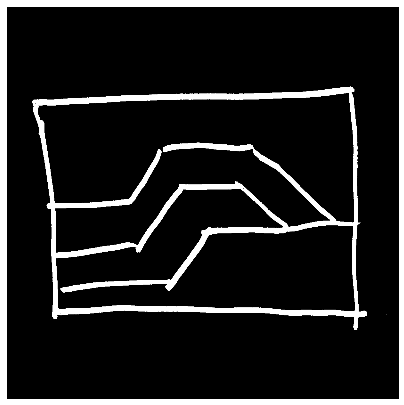

In [12]:
# Ta–daaaaa

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

plt.imshow(binary, cmap='gray')

ax.set_xticks([])
ax.set_yticks([])